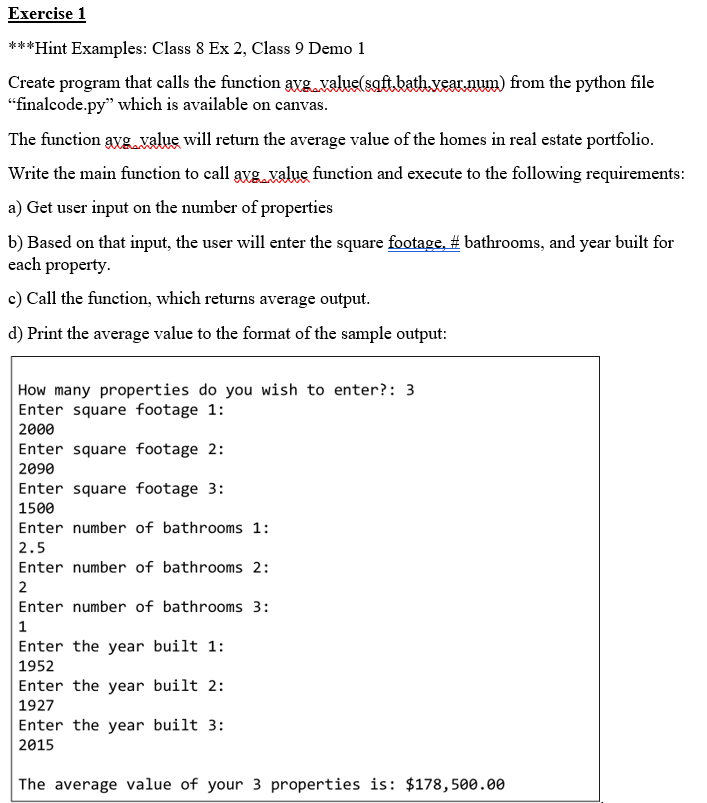

In [ ]:
import finalcode as fc

def main():
    prop = int(input("How many properties do you wish to enter?: "))
    print("How many properties do you wish to enter?: {}".format(prop))

    sq_ft = []
    bathrooms = []
    years = []

    for i in range(prop):
        sq_ft_item = float(input("Enter sqaure footage {}: ".format(i+1)))
        print("Enter sqaure footage {}: \n{:.0f}".format(i+1, sq_ft_item))
        sq_ft.append(sq_ft_item)
    
    for i in range(prop):
        bathroom_item = float(input("Enter number of bathrooms {}: ".format(i+1)))
        print("Enter number of bathrooms {}: \n{}".format(i+1, bathroom_item))
        bathrooms.append(bathroom_item)
    
    for i in range(prop):
        year_item = float(input("Enter the year built {}: ".format(i+1)))
        print("Enter the year built {}: \n{:.0f}".format(i+1, year_item))
        years.append(year_item)

    x = fc.avg_value(sq_ft, bathrooms, years, prop)
    print("\nThe average value of your {} properties: ${:,.2f}".format(prop, x))
main()

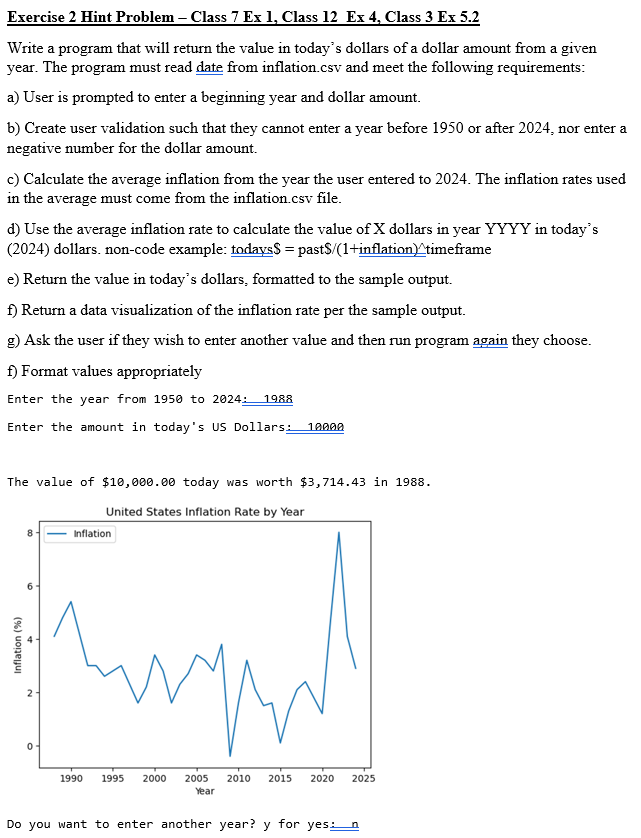

Enter the year from 1950 to 2024: 1988
Enter the amount in today's US Dollars: $10,000
75
The value of $10,000 today was worth $3,714.43 in 1988


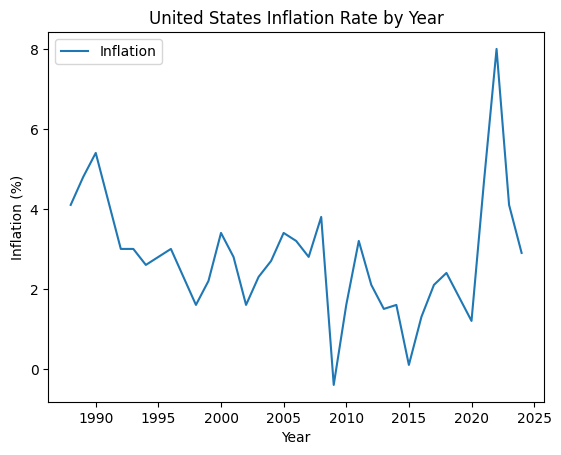

Do you want to enter another year? y for yes: n


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

def avg_inflation(year_user, inf_df):
    df_filtered = inf_df[inf_df['Year']>=year_user]
    avg_if = df_filtered['Inflation'].mean()
    return avg_if, df_filtered

def pv_cal(year_user, amt_user, avg_inf, df_filtered, index):
    print(index)
    nper = df_filtered['Year'][index-1]-year_user
    disc_factor = (1+avg_inf/100)**nper
    past_val = amt_user/disc_factor
    return past_val

def inflation_plot(df_filtered):
    df_filtered.plot(x='Year', y='Inflation')
    
    # Alternative
    # years = df_filtered["Year"].values
    # inflation = df_filtered["Inflation"].values

    # # Plot with pure matplotlib
    # plt.plot(years, inflation, label="Inflation")

    plt.legend()
    plt.title("United States Inflation Rate by Year")
    plt.xlabel("Year")
    plt.ylabel("Inflation (%)")
    plt.show()

def main():
    inf_df = pd.read_csv("inflation.csv")
    count_index = inf_df['Year'].count()

    while True:
        year_user = int(input("Enter the year from {} to {}: ".format(inf_df["Year"][0], inf_df["Year"][count_index-1])))
        # year_user = 1988
        print("Enter the year from {} to {}: {}".format(inf_df["Year"][0], inf_df["Year"][count_index-1], year_user))

        if (year_user<inf_df["Year"][0] or year_user>inf_df["Year"][count_index-1] or year_user<=0):
            print("Your input is not valid and out of range or -ve, enter another year")
            continue

        amt_user = float(input("Enter the amount in today's US Dollars: "))
        # amt_user = 10000
        print("Enter the amount in today's US Dollars: ${:,.0f}".format(amt_user))

        avg_inf, df_filtered = avg_inflation(year_user, inf_df)

        past_val = pv_cal(year_user, amt_user, avg_inf, df_filtered, count_index)

        print("The value of ${:,.0f} today was worth ${:,.2f} in {}".format(amt_user, past_val, year_user))

        inflation_plot(df_filtered)

        resp = input("Do you want to enter another year? y for yes: ").lower()
        # resp = 'n'
        print("Do you want to enter another year? y for yes: {}".format(resp))

        if resp == 'n' or resp == 'no':
            break
        else:
            continue

    # inf_df_sort = inf_df.sort_values(by="Year", ascending=False)
    # display(inf_df_sort)
main()